## Intro
This project involves applying linear regression to predict customer spending behavior based on various features. The dataset used for this analysis contains customer information and their engagement with an e-commerce company's services. Each record includes details such as the customer’s average session length, time spent on the company's mobile app, time spent on their website, and the length of their membership.

The main objective of this project is to build a linear regression model that can predict the yearly amount spent by a customer based on their behavior and engagement metrics. Understanding the relationships between these features and yearly spending will help the company better allocate resources to retain high-value customers and improve their marketing strategies.

This project focus on the following tasks:

    1. Exploratory Data Analysis (EDA) to understand the structure of the data and key relationships between variables.
    2. Building a linear regression model to predict the yearly amount spent.
    3. Evaluating the performance of the model and interpreting the results.

## Get the Data & imports

Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

customers = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Basic Information and Summary Statistics
The `info()` method provides a concise summary of the dataset, including the number of non-null values in each column, and the data types. The `describe()` method gives a statistical summary, including the count, mean, standard deviation, and percentiles of the numerical columns.

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Missing Values
We check for missing values in the dataset to ensure data quality. If any missing values are present, appropriate steps such as imputation or removal can be taken. There are no missing values in this dataset (look `info` or `isnull().sum()`)

In [104]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Exploratory Data Analysis

### Distribution of Key Features
The histograms above show the distributions of four important features: `Avg. Session Length`, `Time on App`, `Time on Website`, and `Length of Membership`. These distributions help us understand how these variables are spread across different customers.

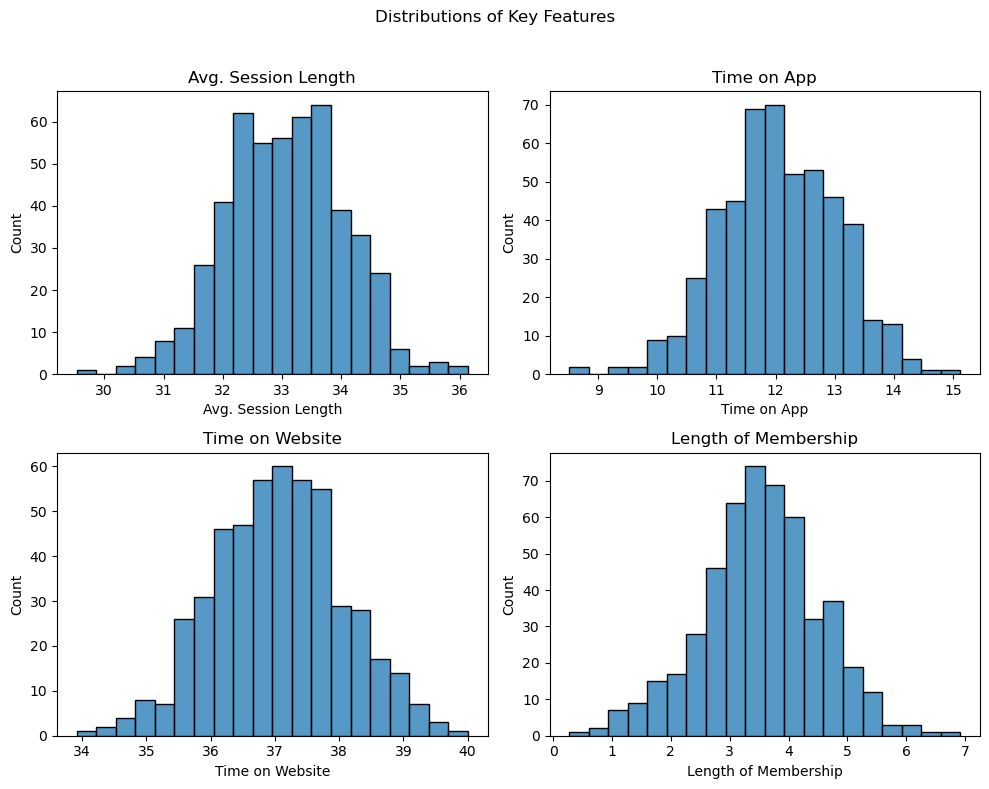

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distributions of Key Features')

sns.histplot(customers['Avg. Session Length'], bins=20, ax=axes[0, 0], kde=False)
axes[0, 0].set_title('Avg. Session Length')

sns.histplot(customers['Time on App'], bins=20, ax=axes[0, 1], kde=False)
axes[0, 1].set_title('Time on App')

sns.histplot(customers['Time on Website'], bins=20, ax=axes[1, 0], kde=False)
axes[1, 0].set_title('Time on Website')

sns.histplot(customers['Length of Membership'], bins=20, ax=axes[1, 1], kde=False)
axes[1, 1].set_title('Length of Membership')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Correlation Matrix
The correlation matrix above shows the relationships between the numerical variables in the dataset. A high positive correlation is observed between `Length of Membership` and `Yearly Amount Spent`, which suggests that customers who have been members longer tend to spend more.

In [70]:
corr_matrix = customers.corr()

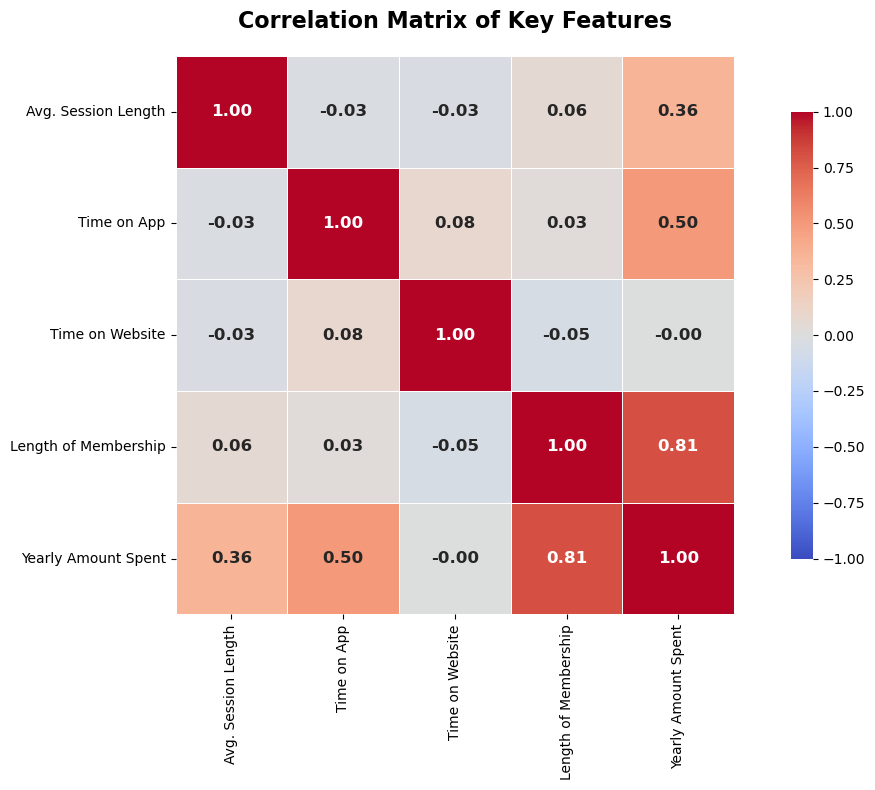

In [96]:
plt.figure(figsize=(12,8))


sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f',             
            cmap='coolwarm',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'shrink': 0.8, 'aspect': 20},
            square=True,
            annot_kws={"size": 12, "weight": "bold"},
            vmin=-1, vmax=1)


plt.title('Correlation Matrix of Key Features', fontsize=16, weight='bold', pad=20)


plt.tight_layout()


plt.show()

This version of the heatmap will be accessible to a wider audience, including individuals with various types of color vision deficiencies

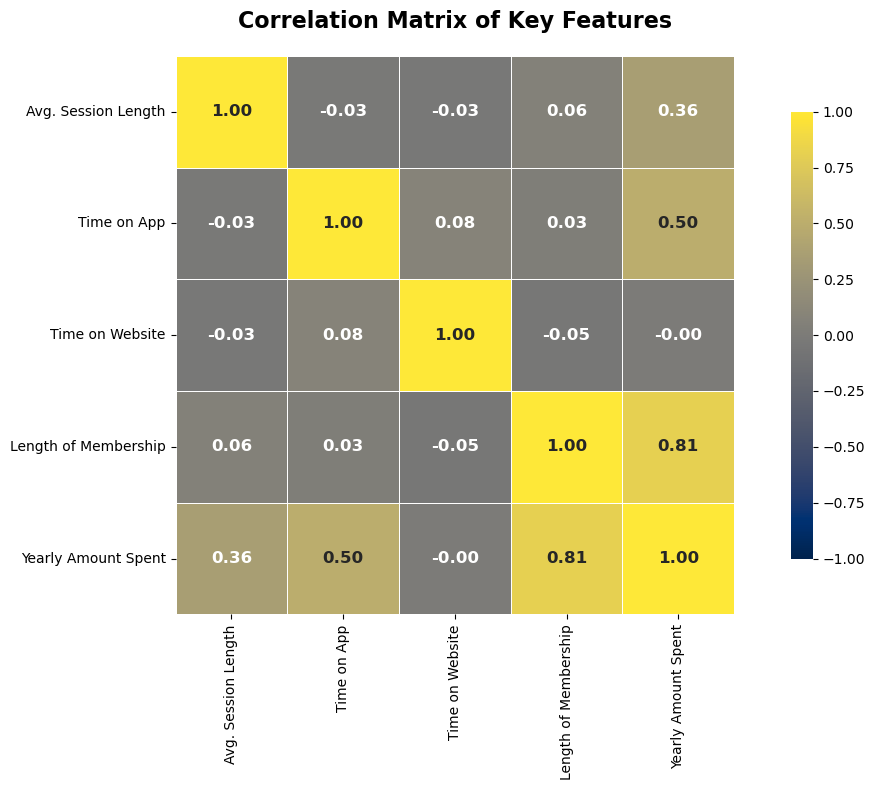

In [98]:
plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f',              
            cmap='cividis',          
            linewidths=0.5,          
            linecolor='white',       
            cbar_kws={'shrink': 0.8, 'aspect': 20},  
            square=True,             
            annot_kws={"size": 12, "weight": "bold"},  
            vmin=-1, vmax=1)         

plt.title('Correlation Matrix of Key Features', fontsize=16, weight='bold', pad=20)

plt.tight_layout()

plt.show()

### Relationship Between Time on Website and Yearly Amount Spent
The jointplot below visualizes the relationship between `Time on Website` and `Yearly Amount Spent`. Each point represents a customer, and the scatterplot helps us understand if there is any correlation between how much time a customer spends on the website and their yearly expenditure.

In addition, the marginal histograms on the x and y axes show the distribution of both `Time on Website` and `Yearly Amount Spent` individually. From the plot, there seems no linear relationship between these two variables, as the points are spread out without a clear upward or downward trend. This suggests that the time a customer spends on the website does not strongly predict their yearly spending.

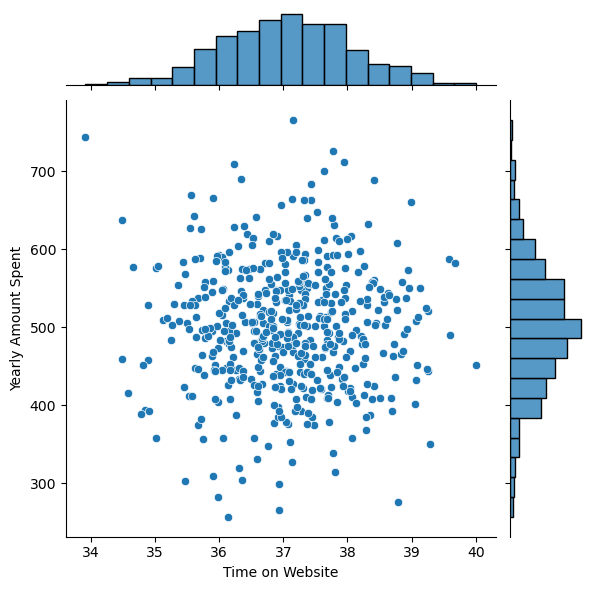

In [81]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')
plt.show()

### Relationship Between Time on App and Yearly Amount Spent
The jointplot below shows the relationship between `Time on App` and `Yearly Amount Spent`. The scatterplot reveals that there is a more defined positive relationship between these two variables compared to `Time on Website`. As the time spent on the app increases, the yearly amount spent also tends to increase, indicating that customers who engage more with the app are likely to spend more annually.

The marginal histograms further illustrate the distribution of these variables, with most customers spending moderate amounts of time on the app and having a moderate yearly expenditure. The positive trend visible in the scatterplot suggests that encouraging customers to use the app more frequently could potentially increase their yearly spending.

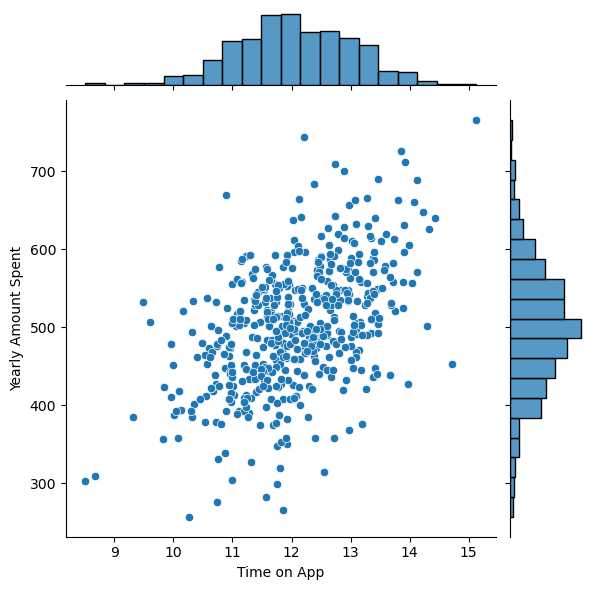

In [7]:
sns.jointplot(data=customers,x='Time on App', y='Yearly Amount Spent')

### Relationship Between Time on App and Length of Membership (Hex Plot)
The hexagonal jointplot below visualizes the relationship between `Time on App` and `Length of Membership` using hex bins, which group data points into hexagons to indicate density. This is useful for larger datasets as it helps identify clusters of data points and regions of higher density.

The plot shows that there is a moderately (or low) positive relationship between the `Time on App` and `Length of Membership`. Customers who have been members for a longer time tend to spend more time using the app, which suggests a stronger engagement with the app over the duration of their membership. 

The denser regions (darker hexagons) indicate that the majority of customers have spent moderate amounts of time on the app and have medium-length memberships. This pattern could suggest that retaining customers longer might increase their interaction with the app.

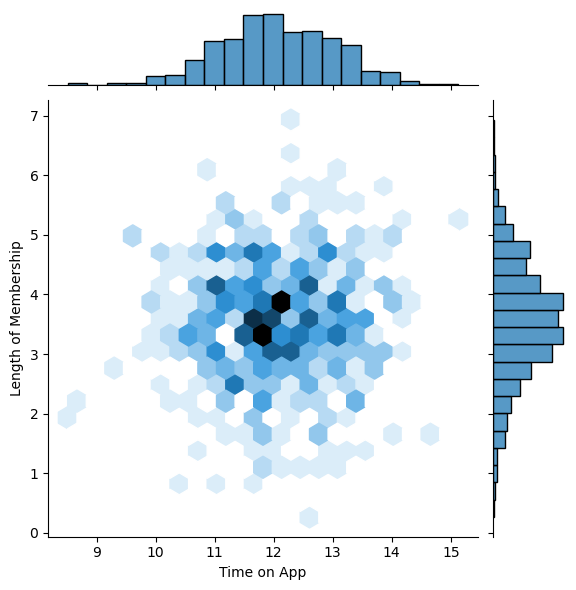

In [11]:
sns.jointplot(data=customers,x='Time on App',y='Length of Membership',kind='hex')

### Pairplot of Key Features and Yearly Amount Spent
The pairplot below shows scatterplots between pairs of important features. This helps us visually inspect how each feature is related to the target variable (`Yearly Amount Spent`). There seems to be a strong positive relationship between `Length of Membership` and `Yearly Amount Spent`, indicating that customers who have been members longer tend to spend more.

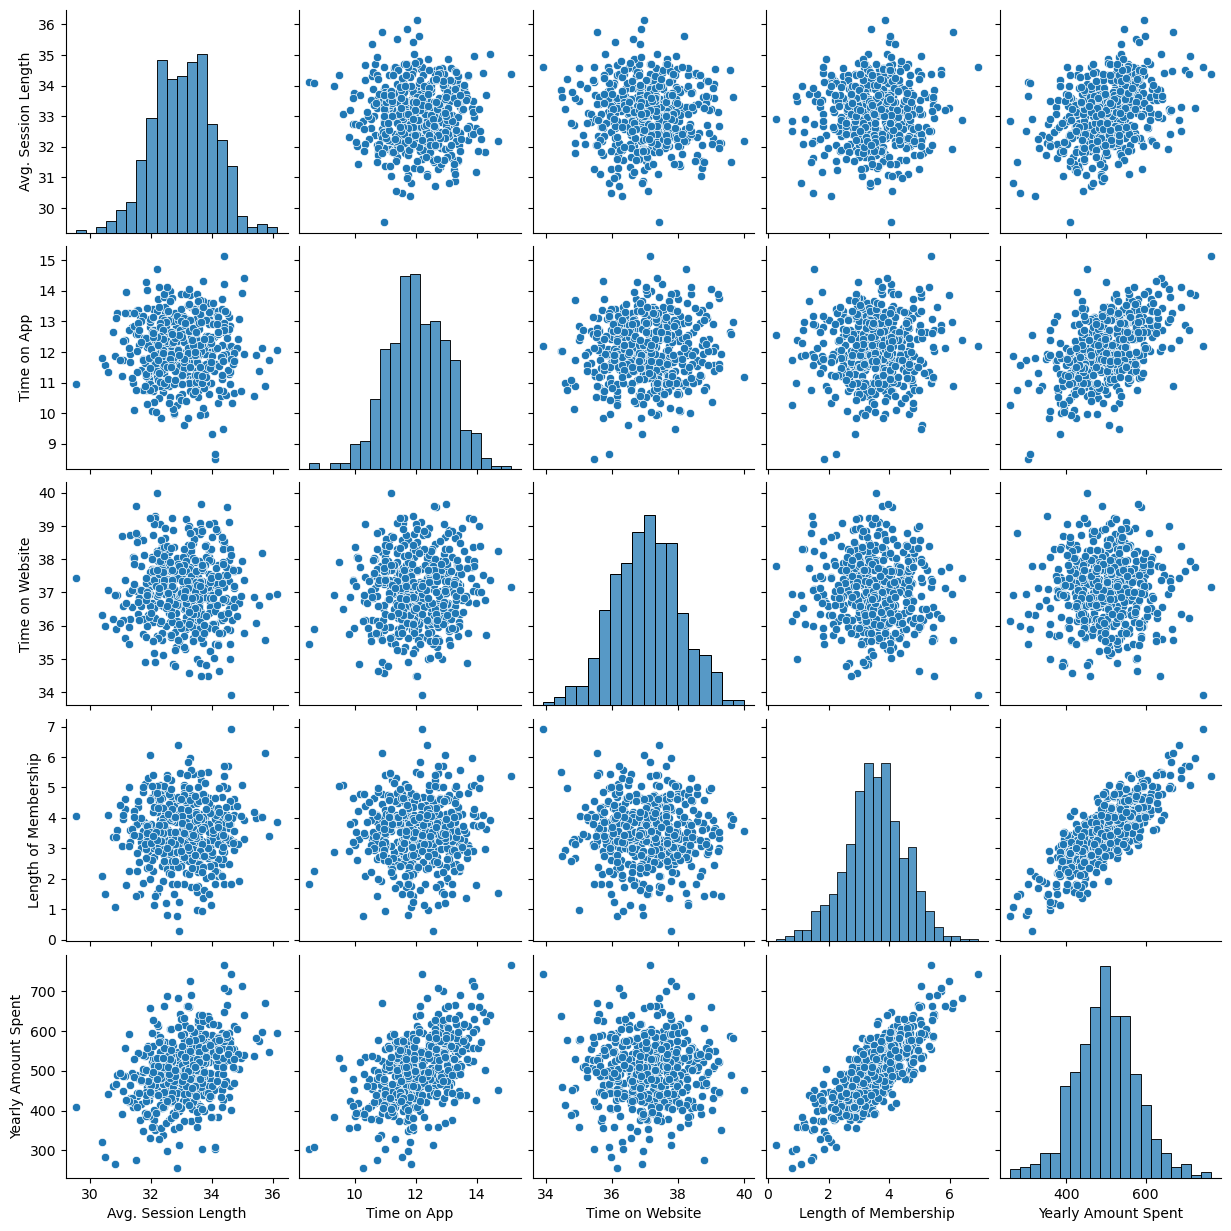

In [9]:
sns.pairplot(data=customers)

### Relationship Between Length of Membership and Yearly Amount Spent
The plot below shows a linear regression model fit between `Length of Membership` and `Yearly Amount Spent`. This visualization helps us understand the relationship between how long a customer has been a member and how much they spend annually.

The positive slope of the regression line suggests that as the length of membership increases, the yearly amount spent tends to increase as well. This indicates that long-term customers are likely to spend more compared to newer customers, which could be a valuable insight for customer retention and marketing strategies.


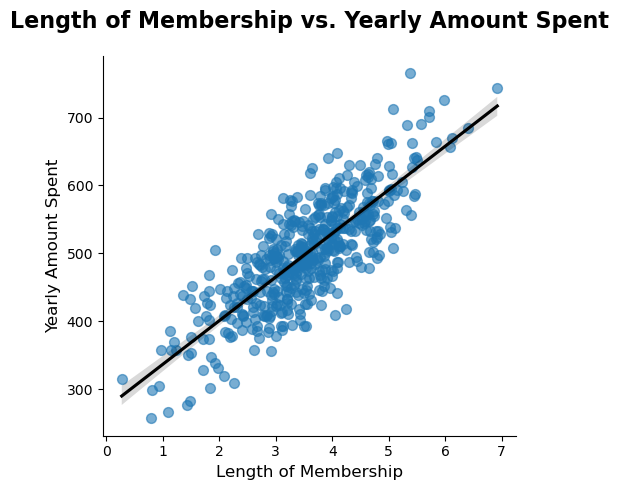

In [126]:
sns.lmplot(data=customers, 
           y='Yearly Amount Spent', 
           x='Length of Membership', 
           scatter_kws={'s': 50, 'alpha': 0.6},
           line_kws={'color': 'black'},
           palette="cividis")

plt.title('Length of Membership vs. Yearly Amount Spent', fontsize=16, weight='bold', pad=20)
plt.xlabel('Length of Membership', fontsize=12)
plt.ylabel('Yearly Amount Spent', fontsize=12)

plt.tight_layout()
plt.show()

## Training and Testing Data


### Defining Features (X) and Target Variable (y)
In this step, we define the independent variables (features) and the dependent variable (target) for our linear regression model.

In [129]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [261]:
X = customers[['Avg. Session Length',
               'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

### Splitting the Data into Training and Testing Sets
To evaluate the performance of our linear regression model, we split the dataset into training and testing sets using a 70-30 split. The training set (70% of the data) will be used to train the model, while the testing set (30% of the data) will be used to assess how well the model generalizes to unseen data. The `random_state=101` ensures that the split is reproducible.

By reserving a portion of the data for testing, we can prevent overfitting and provide a more accurate estimate of the model’s performance on new data.


In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Fitting the Linear Regression Model
In this step, we initialize a **LinearRegression** model and fit it to the training data.

In [265]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

### Interpreting the Coefficients of the Linear Regression Model
After fitting the linear regression model, we can examine the learned coefficients to understand the impact of each feature on the target variable.

In [267]:
lm.coef_

coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


The strongest predictors of yearly spending are Length of Membership and Time on App. This implies that customers who have been members for a longer period and who spend more time on the app tend to be the most valuable in terms of spending.

The time spent on the website has a very minimal impact on spending, which could indicate that improvements in the website experience might not lead to significant increases in sales.

To maximize revenue, the company might focus on strategies that encourage customers to engage more with the app and retain long-term members.

### Making Predictions on the Test Set
After training the linear regression model, we use it to make predictions on the test set (`X_test`).

In [269]:
predictions_linear = lm.predict(X_test)

## Evaluating the Model

Let's evaluate our model performance.
To assess the accuracy of our linear regression model, we use several key evaluation metrics:

- **Mean Absolute Error (MAE):** The MAE represents the average of the absolute differences between the predicted and actual values. It provides a straightforward measure of prediction accuracy by showing how much, on average, our model's predictions deviate from the actual values.

- **Mean Squared Error (MSE):** The MSE calculates the average of the squared differences between predicted and actual values. By squaring the errors, MSE penalizes larger errors more than smaller ones, making it useful when outliers are a concern.

- **Root Mean Squared Error (RMSE):** The RMSE is simply the square root of the MSE and is expressed in the same units as the target variable (`Yearly Amount Spent`). It provides an easily interpretable measure of the model's prediction error and is one of the most commonly used metrics in regression analysis.

In [294]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions_linear))
print('MSE:', metrics.mean_squared_error(y_test, predictions_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_linear)))

MAE: 7.228148653430832
MSE: 79.81305165097444
RMSE: 8.933815066978633


### Interpretation of Model Evaluation Metrics
MAE: this means that, on average, the predicted yearly amount spent is off by approximately 7.23, whether higher or lower than the actual value.

MSE: highlights the presence of any significant outliers, as large errors will disproportionately affect this value.

RMSE: 8.93 indicates that, on average, the model’s predictions deviate from the actual values by approximately 8.93 units. This is slightly higher than the MAE, which implies that some predictions may have larger errors, but overall, the errors are relatively small.

### Residuals

Linearity between Features and Target: to check the linearity assumption, you can create a scatterplot between the residuals and the predicted values.

#### Linearity Assumption
The plot below shows the residuals (the difference between actual and predicted values) against the predicted values. The residuals should appear randomly scattered around the horizontal line at zero. If there is no distinct pattern (such as a curve or clusters), it suggests that the linearity assumption holds. The random scatter in the plot indicates that our model is capturing the linear relationship between `Length of Membership` and `Yearly Amount Spent`.


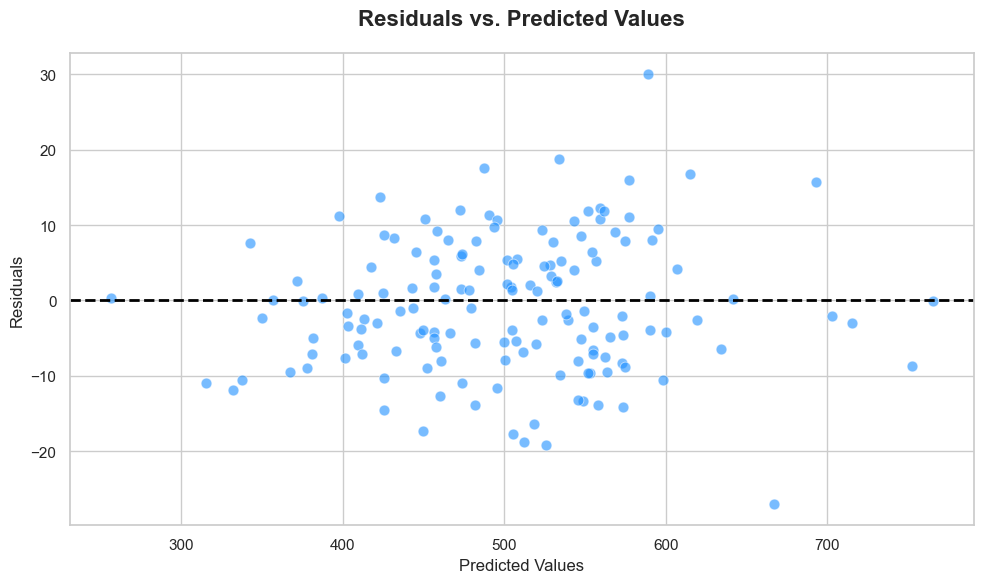

In [168]:
residuals = y_test - predictions

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.scatterplot(x=predictions, y=residuals, alpha=0.6, color='dodgerblue', s=60, edgecolor='w')
plt.axhline(0, linestyle='--', color='black', lw=2)
plt.title('Residuals vs. Predicted Values', fontsize=16, weight='bold', pad=20)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

plt.tight_layout()
plt.show()

#### Residuals Distribution with Kernel Density Estimate (KDE)
The histogram below shows the distribution of the residuals.
A **Kernel Density Estimate (KDE)** is overlaid on the histogram to provide a smooth estimate of the probability density function of the residuals.

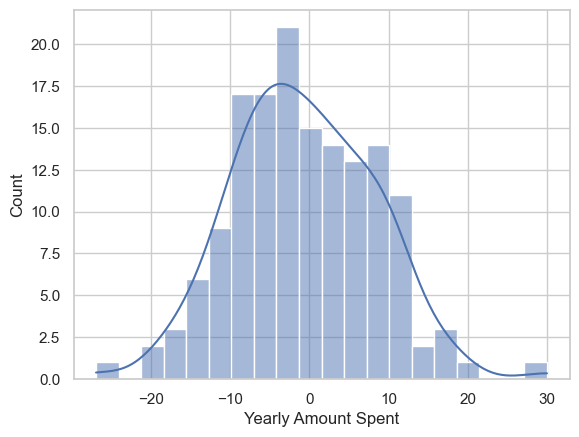

In [172]:
sns.histplot((residuals),kde=True,bins=20)
plt.show()

###  Normality of Residuals

The normality of residuals can be checked using a Q-Q plot (quantile-quantile plot). If the residuals are normally distributed, the points on the Q-Q plot will fall approximately along a straight line.

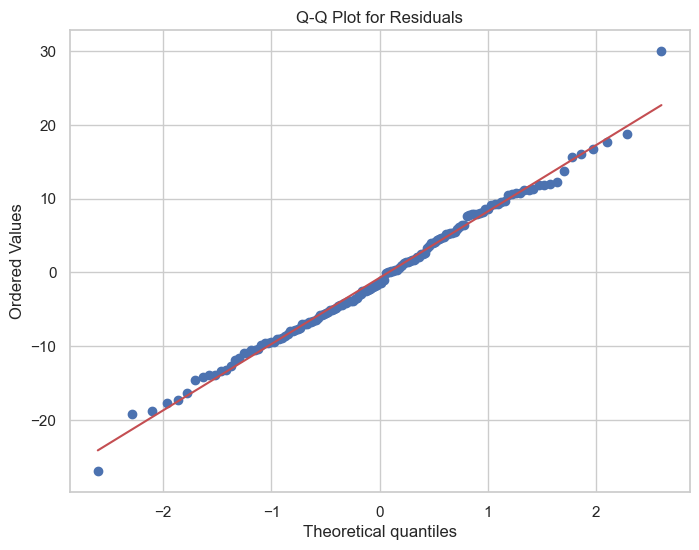

In [182]:
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

### Multicollinearity

Multicollinearity occurs when predictor variables are highly correlated with each other, which can affect the stability of the regression coefficients. The Variance Inflation Factor (VIF) is used to check for multicollinearity.

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Feature,VIF
0,Avg. Session Length,613.185924
1,Time on App,144.019714
2,Time on Website,658.495572
3,Length of Membership,13.578801


The extremely high VIF values (well above the commonly accepted threshold of 10) for Avg. Session Length, Time on App, and Time on Website suggest that these features are highly correlated with each other. This multicollinearity can lead to several issues in the model:

    - The linear regression coefficients might become unstable, making it difficult to interpret the effect of individual features.
    - inflates the standard errors of the coefficients, reducing the statistical significance of the predictors.

## Highly correlated features

To address the multicollinearity, you may need to:

    - Remove or combine highly correlated features.
    - Use dimensionality reduction techniques such as Principal Component Analysis (PCA).
    - Consider using regularization techniques like Ridge Regression or Lasso Regression.

### Principal Component Analysis (PCA)

PCA will create new features (principal components) that are linear combinations of the original features and are uncorrelated.

In [201]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = customers[['Time on Website', 'Time on App']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1) #reduce to one component
customers['PCA Time Spent'] = pca.fit_transform(X_scaled)

In [273]:
X = customers[['Avg. Session Length',
               'PCA Time Spent',
               'Length of Membership']]
y = customers['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
predictions_pca = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions_pca))
print('MSE:', metrics.mean_squared_error(y_test, predictions_pca))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_pca)))

MAE: 24.292991942899224
MSE: 886.9884082733987
RMSE: 29.782350616991245


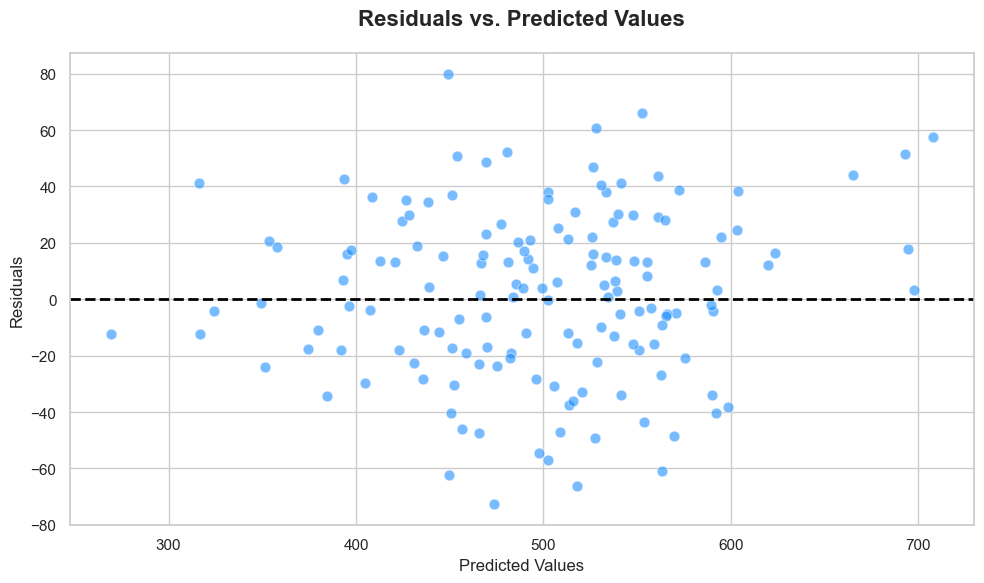

In [218]:
residuals = y_test - predictions

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.scatterplot(x=predictions, y=residuals, alpha=0.6, color='dodgerblue', s=60, edgecolor='w')
plt.axhline(0, linestyle='--', color='black', lw=2)
plt.title('Residuals vs. Predicted Values', fontsize=16, weight='bold', pad=20)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

plt.tight_layout()
plt.show()

In [220]:
X = customers[['Avg. Session Length', 'PCA Time Spent', 'Length of Membership']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Feature,VIF
0,Avg. Session Length,13.549817
1,PCA Time Spent,1.000066
2,Length of Membership,13.549952


### Analysis of the Results After PCA:
After applying Principal Component Analysis (PCA), the Variance Inflation Factor (VIF) has significantly improved.

However, the regression performance metrics — MAE: 24.29, MSE: 886.99, and RMSE: 29.78 indicate that the model's predictive performance has worsened after the PCA transformation, as the error metrics are much higher than before (loss of interpretability or important relationships in the original data)

### Ridge or Lasso Regression to Handle Multicollinearity

Ridge Regression (L2 regularization) adds a penalty to the size of the coefficients.

Lasso Regression (L1 regularization) can not only handle multicollinearity but also perform feature selection by shrinking some coefficients to zero.

In [275]:
from sklearn.linear_model import Ridge

X = customers[['Avg. Session Length',
               'Time on Website', 
               'Time on App',
               'Length of Membership']]

y = customers['Yearly Amount Spent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


ridge_model = Ridge(0.1)  # alpha (float) is the strength by default = 1
ridge_model.fit(X_train, y_train)
predictions_ridge = ridge_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))

MAE: 7.22891562618898
MSE: 79.84498752781496
RMSE: 8.935602247628022


In [277]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(0.1)
lasso_model.fit(X_train, y_train)
predictions_lasso = lasso_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso)))

MAE: 7.237707403515369
MSE: 80.16067293919915
RMSE: 8.953249295043623


#### Oservations:

Both Ridge and Lasso have brought the error metrics much closer to their original values (before PCA), indicating better performance in comparison to the PCA-based model.

Ridge Regression slightly outperforms Lasso Regression based on all metrics (MAE, MSE, RMSE), though the differences are minimal.

#### Experiment with Polynomial Features:
Another option is to explore non-linear relationships using Polynomial Features, which might help capture interactions between the features in a more meaningful way.

In [279]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

lm_poly = LinearRegression()
lm_poly.fit(X_poly, y_train)
predictions_poly = lm_poly.predict(poly.transform(X_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions_poly))
print('MSE:', metrics.mean_squared_error(y_test, predictions_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_poly)))

MAE: 7.432195703827437
MSE: 85.34745505512657
RMSE: 9.238368636026957


#### Observations:

Ridge Regression (MAE: 7.23, RMSE: 8.94) and Lasso Regression (MAE: 7.24, RMSE: 8.95) still outperform the polynomial model in terms of predictive accuracy.

The polynomial model introduces additional complexity without improving the model’s performance, suggesting that the linear relationships between features and the target variable are already well captured by the Ridge and Lasso models

In [320]:
models = ['Simple Linear','after_PCA','Ridge', 'Lasso', 'Polynomial']
metrics_name = ['MAE', 'MSE', 'RMSE']

list_of_predictions = [predictions_linear, predictions_pca, predictions_ridge, predictions_lasso, predictions_poly]
mae_values = [metrics.mean_absolute_error(y_test, pred) for pred in list_of_predictions]
mse_values = [metrics.mean_squared_error(y_test, pred) for pred in list_of_predictions]
rmse_values = [metrics.root_mean_squared_error(y_test, pred) for pred in list_of_predictions]
df_metrics = pd.DataFrame({
    'Model': models,
    'MAE': mae_values,
    'MSE': mse_values,
    'RMSE': rmse_values
})

df_melted = pd.melt(df_metrics.drop('MSE',axis=1), id_vars="Model", var_name="Metric", value_name="Value")

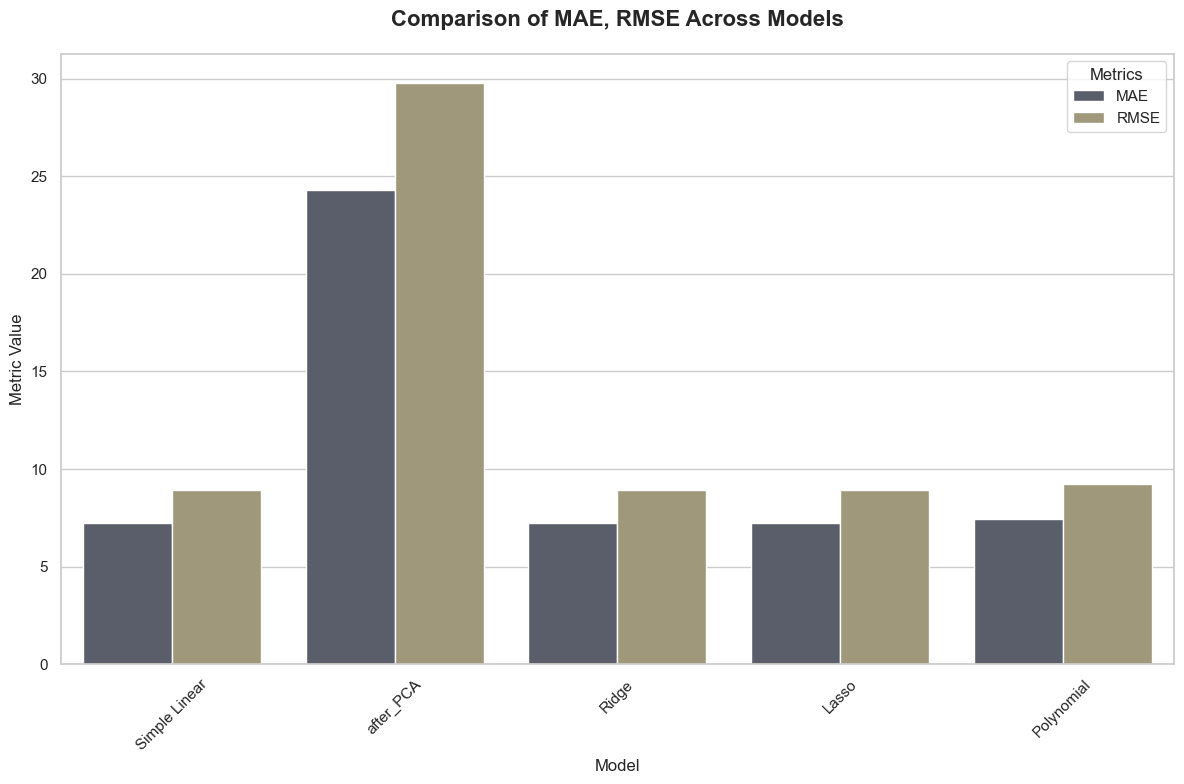

In [326]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette="cividis")

plt.title('Comparison of MAE, RMSE Across Models', fontsize=16, weight='bold', pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper right')


plt.tight_layout()
plt.show()

In [353]:
df_melted = pd.melt(df_metrics.drop('MSE',axis=1).drop(1,axis=0), id_vars="Model", var_name="Metric", value_name="Value")

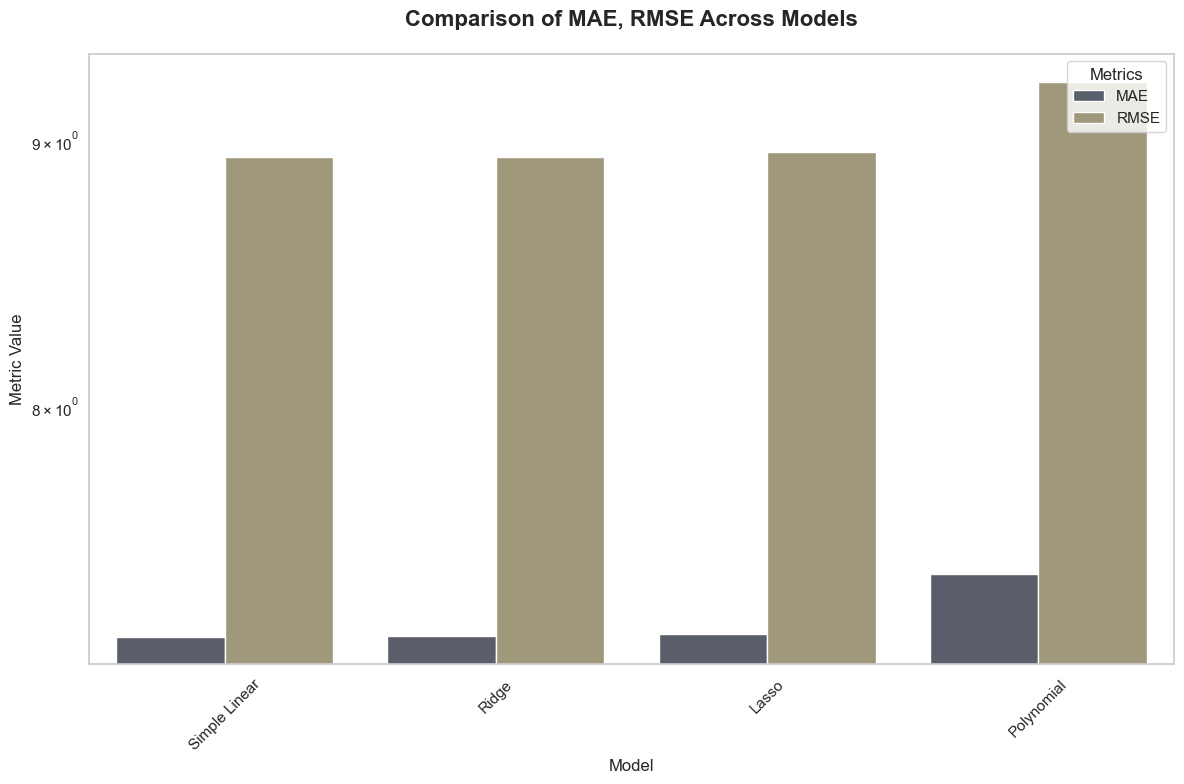

In [355]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette="cividis")

plt.title('Comparison of MAE, RMSE Across Models', fontsize=16, weight='bold', pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left')
plt.yscale('log')

plt.tight_layout()
plt.show()

In [361]:
df_melted = pd.melt(df_metrics.drop(['MSE','RMSE'],axis=1).drop([1,4],axis=0), id_vars="Model", var_name="Metric", value_name="Value")

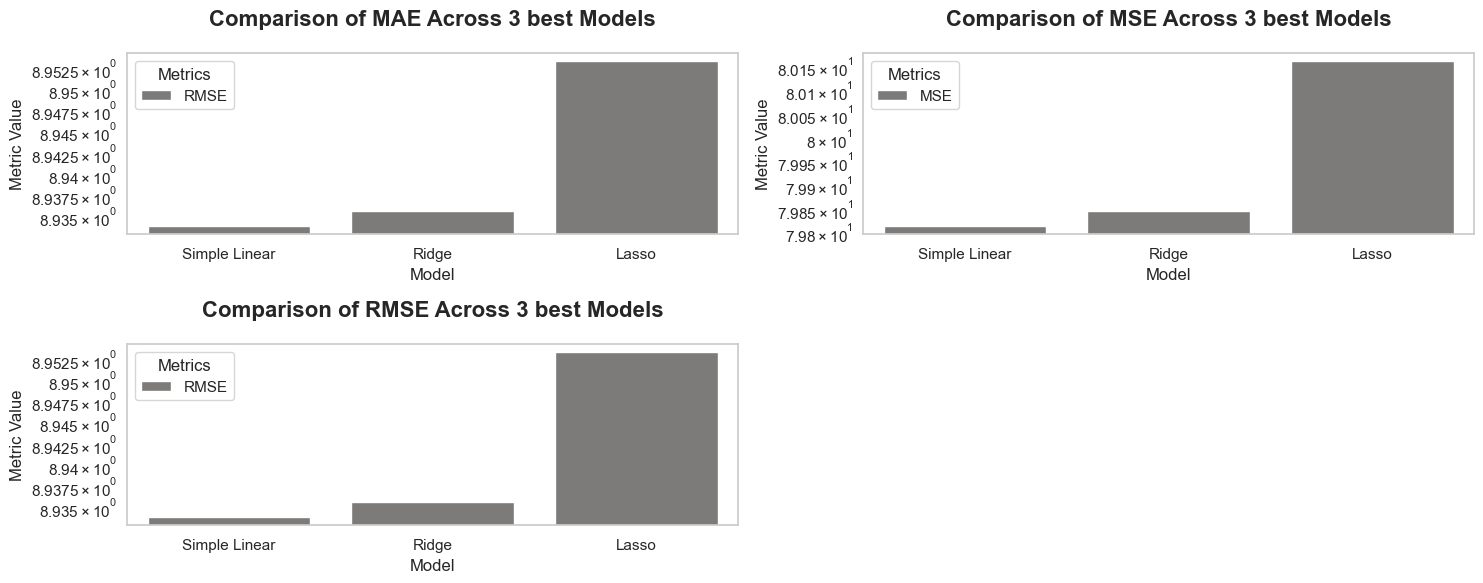

In [440]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()

sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette="cividis", ax = ax[0])

ax[0].set_title('Comparison of MAE Across 3 best Models', fontsize=16, weight='bold', pad=20)
ax[0].set_xlabel('Model', fontsize=12)
ax[0].set_ylabel('Metric Value', fontsize=12)
ax[0].legend(title='Metrics', loc='upper left')
ax[0].set_yscale('log')

df_melted = pd.melt(df_metrics.drop(['MAE','RMSE'],axis=1).drop([1,4],axis=0), id_vars="Model", var_name="Metric", value_name="Value")
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette="cividis", ax = ax[1])

ax[1].set_title('Comparison of MSE Across 3 best Models', fontsize=16, weight='bold', pad=20)
ax[1].set_xlabel('Model', fontsize=12)
ax[1].set_ylabel('Metric Value', fontsize=12)
ax[1].legend(title='Metrics', loc='upper left')
ax[1].set_yscale('log')

df_melted = pd.melt(df_metrics.drop(['MAE','MSE'],axis=1).drop([1,4],axis=0), id_vars="Model", var_name="Metric", value_name="Value")
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette="cividis", ax = ax[2])

ax[2].set_title('Comparison of RMSE Across 3 best Models', fontsize=16, weight='bold', pad=20)
ax[2].set_xlabel('Model', fontsize=12)
ax[2].set_ylabel('Metric Value', fontsize=12)
ax[2].legend(title='Metrics', loc='upper left')
ax[2].set_yscale('log')

fig.delaxes(ax[3])

plt.tight_layout()
plt.show()

## Cross-validation

In this section, we implement **cross-validation** using the `cross_val_predict` method from `sklearn.model_selection` to evaluate three different models: **Linear Regression**, **Ridge Regression**, and **Lasso Regression**. This approach allows us to generate cross-validated predictions and assess the model's performance on unseen data.

We use **5-fold cross-validation** (`cv=5`) to generate predictions for each model. Cross-validation helps reduce overfitting by training the model on different subsets of the data and predicting on the held-out portion, ensuring more robust model evaluation.

In [434]:
from sklearn.model_selection import cross_val_predict


linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

scoring = 'neg_mean_squared_error'

predictions_linear = cross_val_predict(linear_model, X, y, cv=5)
predictions_ridge = cross_val_predict(ridge_model, X, y, cv=5)
predictions_lasso = cross_val_predict(lasso_model, X, y, cv=5)

def print_metrics(y_true, y_pred, model_name):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'{model_name} MAE: {mae:.4f}')
    print(f'{model_name} MSE: {mse:.4f}')
    print(f'{model_name} RMSE: {rmse:.4f}')
    print('')

print_metrics(y, predictions_linear, "Linear Model")
print_metrics(y, predictions_ridge, "Ridge Model")
print_metrics(y, predictions_lasso, "Lasso Model")

Linear Model MAE: 7.9447
Linear Model MSE: 100.4575
Linear Model RMSE: 10.0228

Ridge Model MAE: 7.9404
Ridge Model MSE: 100.4871
Ridge Model RMSE: 10.0243

Lasso Model MAE: 8.0694
Lasso Model MSE: 103.3985
Lasso Model RMSE: 10.1685

